In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Titanic Dataset Exploration

by Johannes Bock, July 31, 2016

### *1) Research Question*
The following analysis is aimed at answering the following research question: 

"What factors determined survival on Titanic?"

### *2) Data Wrangling & Cleaning*

The sample dataset containing passenger information from 891 of the 2224 passengers and crew on board the Titanic was obtained from [Kaggle](https://www.kaggle.com/c/titanic/data).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
titanic_df = pd.read_csv("titanic_data.csv",index_col=["PassengerId"])

After the dataset has been loaded using pandas, I first need to get an idea of its features and structure.

In [2]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The *Name*, *Ticket* and *Cabin* variables are assumed to be not very helpful in finding general patterns of survival, since they only give specific information on the passengers individually. Therefore, I am excluding these columns from the subsequent analysis.

In [3]:
# Excluding variables from the analysis
no_cabin_titanic_df = titanic_df.drop(["Cabin","Name","Ticket"],1)

In order to investigate missing data issues, the following table containing non-missing record counts for each variable is calculated.

In [4]:
no_cabin_titanic_df.count()

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

There actually is some data missing for the dimensions *Age* and *Embarked* (Which refers according to the data description to the harbour, where the passenger  embarked the Titanic). For the analysis of this dataset, I will ignore all passenger records without the full information.

In [5]:
#Get rid of records with missing age/ embarked
no_missing_data_df = no_cabin_titanic_df.dropna()
no_missing_data_df.shape

(712, 8)

Looking at the shape of the data above, one can see that the following analysis will be based upon a sample size of **712 passengers**. Hence, 179 observations were removed due to missing data.

In [6]:
no_missing_data_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

The dataset at hand contains various different data types as shown in the table above. The variables *Sex* and *Embarked* will be encoded for the analysis since they are containing categorical information.

In [7]:
#Convert male=0 and female = 1
gender_mapping = no_missing_data_df["Sex"].map({"male":0,"female":1})

#Convert (0 = Cherbourg; 1 = Queenstown; 2 = Southampton)
embarked_mapping = no_missing_data_df["Embarked"].map({"C":0,"Q":1,"S":2})

#Drop gender & embarked string columns
pre_encoded_df = no_missing_data_df.drop(["Sex","Embarked"],1)

#Join with encoded gender & embarked columns
encoded_gender = pre_encoded_df.join(gender_mapping)
df = encoded_gender.join(embarked_mapping)
df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,2
2,1,1,38.0,1,0,71.2833,1,0
3,1,3,26.0,0,0,7.9250,1,2
4,1,1,35.0,1,0,53.1000,1,2
5,0,3,35.0,0,0,8.0500,0,2


In [8]:
df.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Sex           int64
Embarked      int64
dtype: object

The final pre-processed dataset as shown above contains 712 encoded passenger records (8 variables), which are complete and can help to answer the research question.

## *3) Data Exploration*

In the following section, I will first give a short summary of the dataset and second show some interesting patterns found in the dataset, illustrating what factors might have influenced survival on the Titanic.

**Descriptive Statistics**

In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251,0.363764,1.595506
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648,0.481420,0.779038
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000,2.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850,0.000000,2.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000,1.000000,2.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,2.000000


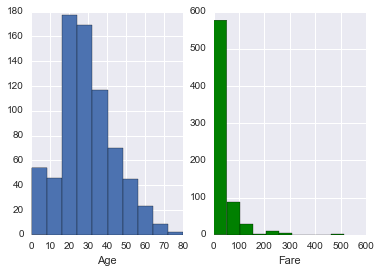

In [10]:
%matplotlib inline
def get_split_in_percent(df,column):
    split = df.groupby(column)["Age"].count()
    split_percent = (split/split.sum())*100
    return split_percent

sex_split = get_split_in_percent(df,"Sex")
survive_split = get_split_in_percent(df,"Survived")
pclass_split = get_split_in_percent(df,"Pclass")
embarked_split = get_split_in_percent(df,"Embarked")

#Age Histogramm
plt.subplot(121)
plt.hist(df["Age"])
plt.xlabel("Age")

#Fare Histogramm
plt.subplot(122)
plt.hist(df["Fare"],color="green")
plt.xlabel("Fare")
plt.show()


The distribution and sample statistics of the variable *Age* in the sample dataset shows that passengers were approx. 30 years on average. Additionally, children and young adults aged 0-20 made up about 25% of all passengers, indicating that many families were aboard. Also, some elderly passengers aged 60-80 were aboard. Both, are interesting age groups to explore in greater depth when it comes to likelihood of survival.

The distribution of the passenger fare indicates that most passengers only paid 35 dollars or less (~ 75%), which is an interesting fact not only from an historical point of view but also regarding chances of survival, as we will see later.

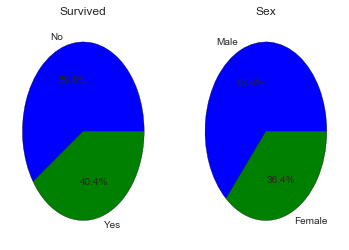

In [11]:
#Survive Pie
plt.subplot(121)
plt.pie(survive_split,autopct='%1.1f%%',labels = ["No","Yes"])
plt.title("Survived")

plt.subplot(122)
plt.pie(sex_split,autopct='%1.1f%%',labels = ["Male","Female"])
plt.title("Sex")



Most passengers in the sample dataset did not survive (59,6%) the trip and most passengers in the sample were male (63,6%).

In [12]:
pclass_split

Pclass
1    25.842697
2    24.297753
3    49.859551
Name: Age, dtype: float64

A majority of 49.86% of all passengers in the sample travelled in 3rd class, which is inline with the distribution of *Passenger Fare* above.

In [13]:
embarked_split

Embarked
0    18.258427
1     3.932584
2    77.808989
Name: Age, dtype: float64

Finally, most passengers in the sample embarked the ship in Southampton, which was the starting point of the trip.

### *Pattern Exploration*

In order to get a grasp, what might have determined survival on Titanic, I will present some interesting patterns in the following part. The following findings are tentative, since except for the variable *Age* I am not using inferential statistics to determine the statistical significance of my findings.

*Class*

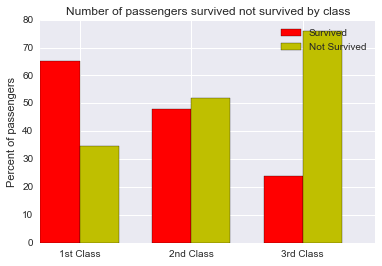

In [14]:
class_survival = df.groupby(["Survived","Pclass"])["Age"].count()
class_count = (df.groupby(["Pclass"])["Age"].count())


ind = np.arange(3)
width = 0.35

survived = 100*class_survival[1]/class_count
not_survived = 100*class_survival[0]/class_count


#creating plots
fig, ax = plt.subplots()
bar_survived = ax.bar(ind, survived.values, width, color='r')
bar_not_survived = ax.bar(ind + width, not_survived.values, width, color='y')

ax.set_ylabel('Percent of passengers')
ax.set_title("Number of passengers survived not survived by class")
ax.set_xticks(ind + width)
ax.set_xticklabels(('1st Class', '2nd Class', '3rd Class'))
ax.legend((bar_survived[0],bar_not_survived[0]),("Survived","Not Survived"))


#class_survival.index.levels[0] Erste index Ebene

From the graph above, it is obvious that the majority of the 1st class passengers (approx. 65%) survived, while the majority of the 3rd class passengers (approx. 75%) died. This pattern is also logical in a sense, that according to [Wikipedia](https://en.wikipedia.org/wiki/Lifeboats_of_the_RMS_Titanic) there were too few lifeboats aboard the Titanic and apparently, richer passengers were granted priority access to these life-saving boats.

*Age*

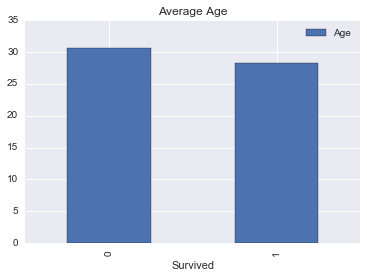

In [15]:
df.groupby("Survived")["Age"].mean().plot(kind="bar",legend=True,title="Average Age")

Looking at the sample mean age, I can see that those passengers who survived were younger than those who did not survive on average. However, in order to determine if this difference in age is statistically significant, a One-tailed Independent One Sample t-Test needs to be conducted. The following test hypothesis applies:

**Null-Hypothesis**: The population mean age for passengers who survived is equal the population mean age for passengers who did not survive.

**Alternative-Hypothesis**: The population mean age for passengers who survived is lower than the population mean age for passengers who did not survive.

In [16]:
#t-Test

survived_df = df[(df.Survived==1)]
not_survived_df = df[(df.Survived==0)]

mean_age_survived = survived_df["Age"].mean()
mean_age_not_survived = not_survived_df["Age"].mean()

SS_survived = ((mean_age_survived-survived_df["Age"])**2).sum()
SS_not_survived = ((mean_age_not_survived-not_survived_df["Age"])**2).sum()
degrees_of_freedom = df["Age"].count()-2

pooled_variance = (SS_survived+SS_not_survived)/degrees_of_freedom
standard_error = np.sqrt(pooled_variance/survived_df["Age"].count()+pooled_variance/not_survived_df["Age"].count())

#one-tailed t-critical value for df = 710 & alpha 0,05
t_critical = -1.64700263
t = (mean_age_survived-mean_age_not_survived)/standard_error

print "Results (One-tailed Independent One Sample t-Test, α = 0,05):"
print
print "Pooled_variance: ", pooled_variance
print "standard_error: ", standard_error
print
print "t({}) = {}, p<0,05, one-tailed".format(degrees_of_freedom,t)
print "Critical t-value (df = {}, α = 0,05, one-tailed) = {}".format(degrees_of_freedom,t_critical)


Results (One-tailed Independent One Sample t-Test, α = 0,05):

Pooled_variance:  208.911187291
standard_error:  1.10367618954

t(710) = -2.20434277484, p<0,05, one-tailed
Critical t-value (df = 710, α = 0,05, one-tailed) = -1.64700263


From the test statistics above, one can conclude that the mean age of passengers who survived is statistically significantly lower than the mean age for those who did not survive. This conclusion can also be underpinned by the reasonable explanation, that children were probably granted priority access to lifeboats as they all had an entire life ahead of them and little chances of survival in the open sea.

*Sex*

In [17]:
df.groupby(["Survived","Sex"])["Age"].count()

Survived  Sex
0         0      360
          1       64
1         0       93
          1      195
Name: Age, dtype: int64

Other than I expected, the majority of passengers, who survived were women. However, when thinking about lifeboat access once again, which is critical for survival, one could again reason, that women were probably granted priority access to lifeboats. This is because chances of survival in the open sea for women would have been much lower than for men.

*Parents & Children*

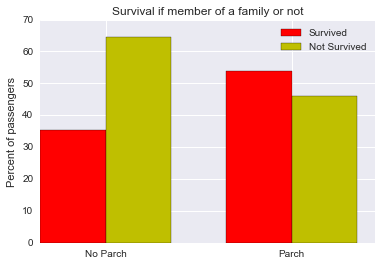

In [18]:
with_parch = df["Parch"]!=0
df_parch=df.join(with_parch,rsuffix='_fam')

fam_count = (df_parch.groupby(["Parch_fam"])["Age"].count())
fam_survival = df_parch.groupby(["Survived","Parch_fam"])["Age"].count()

ind = np.arange(2)
width = 0.35

survived = 100*fam_survival[1]/fam_count
not_survived = 100*fam_survival[0]/fam_count


#creating plots
fig, ax = plt.subplots()
bar_survived = ax.bar(ind, survived.values, width, color='r')
bar_not_survived = ax.bar(ind + width, not_survived.values, width, color='y')

ax.set_ylabel('Percent of passengers')
ax.set_title("Survival if member of a family or not")
ax.set_xticks(ind + width)
ax.set_xticklabels(('No Parch', 'Parch'))
ax.legend((bar_survived[0],bar_not_survived[0]),("Survived","Not Survived"))


The datset also contains information on how many parents or children a particular passenger had aboard. Based on this info, the dataset was into two subsets: Passengers with close family aboard and passengers without close family aboard.

From the bar chart above one can see that a slight majority of passengers with parents or children aboard survived the Titanic disaster. Whereas the majority of passengers without parents or children aboard did not survive. Based on this observation one could once again argue, that families with children were granted priority access to the lifeboats.

## *4) Conclusions*

To sum up, the analysis above gave a few insights into the factors that determined survival on Titanic and in an effort to intpret these results I hypothesized that chances of survival may have closly been related to lifeboat access policies during the Titanic disaster. This of course needs to be verified by investigating further evidence. The following four conclusions summarize my results:

a) Passengers travelling in the 1st class had a higher chance to survive in the Titanic disaster.

b) There is statistically significant evidence that the younger the passengers were the higher their chance of survival. 

c) Women were more likely to survive the Titanic disaster.

d) Passengers with parents & children aboard were more likely to survive than passengers without parents or children aboard.